# MAS DSE 200: Homework 4 - Regression and Clustering

#### Tasks: 

- Linear Regression on Boston Housing dataset
- Clustering on Weather dataset
  
- Submission on Gradescope:
  - Submit this Jupyter notebook to "Homework 4"

#### Due date: Monday 11/15/2022 at 11:59 PM PST

---

Remember: when in doubt, read the documentation first.

Python - https://docs.python.org/3/

NumPy - https://numpy.org/doc/stable/

pandas - https://pandas.pydata.org/docs/

matplotlib - https://matplotlib.org/stable/contents.html

scikit-learn - https://scikit-learn.org/stable/modules/classes.html

In [1]:
seed = 42

### Import libraries/functions

In [2]:
# import
import numpy
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

## Part 1 - Linear Regression - 10 points

### 1. Exploration - (1 point)

Read the data from Boston_Housing.csv file and store it in a dataframe called "housing"


**1.1 Print the number of rows in the dataframe (0.33 points)**

In [3]:
housing = pd.read_csv('Boston_Housing.csv')

len(housing)

506

#### Column names in file and their description

- CRIM — per capita crime rate by town.
- ZN — proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS — proportion of non-retail business acres per town.
- CHAS — Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).
- NOX — nitrogen oxides concentration (parts per 10 million).
- RM — average number of rooms per dwelling.
- AGE — proportion of owner-occupied units built prior to 1940.
- DIS — weighted mean of distances to five Boston employment centres.
- RAD — index of accessibility to radial highways.
- TAX — full-value property-tax rate per $10,000.
- PTRATIO — pupil-teacher ratio by town.
- BLACK — 1000(Bk — 0.63)² where Bk is the proportion of blacks by town.
- LSTAT — lower status of the population (percent).



- **MV** — median value of owner-occupied homes in $1000s. **This is the target variable.**

**1.2. See one row of the dataframe (0.33 points)**

In [4]:
housing.iloc[[0]]

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE   DIS  RAD    TAX  PTRATIO  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.09    1  296.0     15.3   

   BLACK  LSTAT    MV  
0  396.9   4.98  24.0

**1.3. Print `info` of the dataframe (0.34 points)**

In [5]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  BLACK    506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MV       506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


### 2. Feature selection - 2 points


**2.1. Select the following features from the dataframe (0.5 points)**
* Select the following features from the dataframe - ['CRIM' , 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'BLACK', 'LSTAT', 'MV']
* Print `info` of the resulting DataFrame to verify

In [6]:
df = housing[['CRIM' , 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'BLACK', 'LSTAT', 'MV']]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  BLACK    506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MV       506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


**2.2. Drop rows where target variable `MV` has null values (if need) (0.5 points)**

* Print the number of remaining rows

In [7]:
df = df.dropna(subset='MV')
len(df) # rows should be the same

506

**2.3. Fill null values of remaining columns using mean of the column values (if need) (1 points)**


In [8]:
df_mean = df.describe()['MV']['mean'] # mean value
values = {"MV": df_mean}
df.fillna(values) # does nothing since there are no NAN values

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273.0   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273.0   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273.0   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273.0   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273.0   

     PTRATIO   BLACK  LSTAT    MV  
0       15.3  396.90   4.98  24.0  
1       17.8  396.90   9.14  21.6  
2       17.8  392.83   4.03  34.7  
3       18.7  394.63   2.94  33.4  
4       18.7  396.90   5.33  36.2  
..       ...     ...    ...   ...  
501     21.0  391.99   9.67  22.4  
502     21.0  396.90   9.08  20.6  
503     21.0  396.90   5.64  23.9  
504     21.0  393.45   6.48  22.0  
505     21.0  396.90   7.88  11.9  

[506 rows x 14 columns]

### 3. Train test split - 1 point

**3.1. Store features in variable `X` and target MV in variable `y` (0.5 points)**

In [9]:
X = df.drop(columns=['MV'])
y = df['MV']

**3.2. Split the dataset into train and test split (0.5 points)**
 * Train dataframe and test dataframe with a 75:25 split between them (75% for train and 25% for test)
 * Pass `random_state=seed` to train_test_split function to reproduce results
 * Print the number of rows in train and test dataframes

In [10]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=seed)
print(len(x_train),len(y_train), len(x_test), len(y_test))

379 379 127 127


### 4. Standardize the data - 1 point


**4.1. Use `StandardScaler` to fit a scaler model (0.5 points)**
* Use the StandardScaler to standardize your data(only the features, not the target).
* **IMPORTANT** - Use only the training data for scaling
* Standardization results in each column having zero mean and unit standard deviation

In [11]:
scaler = StandardScaler()
scaler.fit(x_train)
scaler.mean_

array([3.46865475e+00, 1.15963061e+01, 1.11199736e+01, 7.65171504e-02,
       5.58326385e-01, 6.32349604e+00, 6.91472296e+01, 3.76343984e+00,
       9.36147757e+00, 4.05311346e+02, 1.82638522e+01, 3.58767124e+02,
       1.25132982e+01])

**4.2. Scale your training and test data (0.5 points)**

In [12]:
scaled_x_train = scaler.transform(x_train)
scaled_x_test = scaler.transform(x_test)

### 5. Training - 2 points

**5.1. Use `LinearRegression` for training a regression model (1.0 points)**

In [13]:
model = LinearRegression()
model.fit(scaled_x_train, y_train)

LinearRegression()

**5.2. Print the coefficients and intercept of the linear regression model (0.5 points)**

In [14]:
print(model.coef_, model.intercept_)

[-1.06546379  0.68154987  0.33928836  0.73726309 -1.93178062  3.14172655
 -0.25586276 -2.95561026  2.21416067 -1.65127265 -2.08714915  1.15235744
 -3.69504236] 22.90791556728232


**5.3. Print the mean squared error(MSE) and coefficient of determination(r2) of the training data (0.5 points)**

In [15]:
y_pred_train = model.predict(scaled_x_train)

print(mean_squared_error(y_pred_train, y_train), r2_score(y_pred_train, y_train))

22.34005799215287 0.6632575454045149


### 6. Test the model on test data - 1 point

**6.1. Print the MSE and r2 on test data. Is it very different from the result on training data? (1 point)**

In [16]:
y_pred_test = model.predict(scaled_x_test)
print(mean_squared_error(y_pred_test, y_test), r2_score(y_pred_test, y_test))

22.098694827097987 0.6586856202269246


### 7. Plot results on test data(using matplotlib) - 2 points

 * In the test data, you have the real values of the target, and you also have predictions for each row of the test data.
 * Plot a scatter plot of the real value (x axis) and the predictions (y axis) on a single plot so that you can visualize how the predictions look as compared to the ground truth (use figsize=(8,8))
 * Plot a x=y red line (45 angle line) to observe how much the real and predicted values differ among them.

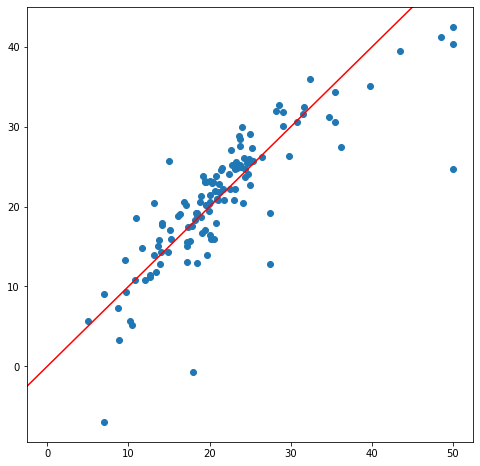

In [17]:
fig, ax = plt.subplots(figsize=(8, 8))
plt.scatter(x=y_test, y=y_pred_test)
ax.axline((0, 0), slope=1,color='red')

## Part 2 - Clustering - 5 points

#### 8. Load Data - 1 point
- Load the "minute_weather.csv" into the Pandas dataframe called `weather`
- Drop the two columns ["rowID", "hpwren_timestamp"] from the dataframe
- Print the `info` of the dataframe

Unlike the regression problem, all remaining columns are features here i.e. there is no `target` variable

In [18]:
weather = pd.read_csv('minute_weather1.csv')

In [19]:
weather = weather.drop(['rowID','hpwren_timestamp'], axis=1)
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1587257 entries, 0 to 1587256
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   air_pressure        1587257 non-null  float64
 1   air_temp            1587257 non-null  float64
 2   avg_wind_direction  1586824 non-null  float64
 3   avg_wind_speed      1586824 non-null  float64
 4   max_wind_direction  1586824 non-null  float64
 5   max_wind_speed      1586824 non-null  float64
 6   min_wind_direction  1586824 non-null  float64
 7   min_wind_speed      1586824 non-null  float64
 8   rain_accumulation   1587256 non-null  float64
 9   rain_duration       1587256 non-null  float64
 10  relative_humidity   1587257 non-null  float64
dtypes: float64(11)
memory usage: 133.2 MB


In [20]:
# handle nulls
weather = weather.fillna(weather.mean())
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1587257 entries, 0 to 1587256
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   air_pressure        1587257 non-null  float64
 1   air_temp            1587257 non-null  float64
 2   avg_wind_direction  1587257 non-null  float64
 3   avg_wind_speed      1587257 non-null  float64
 4   max_wind_direction  1587257 non-null  float64
 5   max_wind_speed      1587257 non-null  float64
 6   min_wind_direction  1587257 non-null  float64
 7   min_wind_speed      1587257 non-null  float64
 8   rain_accumulation   1587257 non-null  float64
 9   rain_duration       1587257 non-null  float64
 10  relative_humidity   1587257 non-null  float64
dtypes: float64(11)
memory usage: 133.2 MB


#### 9. Data Splitting - 0.5 points

**Split into train and test data**
* Split the dataset into train dataframe and test dataframe with a 75:25 split between them (25% of the data goes for test set)
* Pass `random_state=seed` to train_test_split function to reproduce results

In [21]:
train, test = train_test_split(weather, test_size=0.25, random_state=seed)

#### 10. Standardize the data - 0.5 points

* Use the StandardScaler to standardize your data. Unlike the regression problem, all columns are features here i.e. there is no `target` variable
* **IMPORTANT** - Use only the training data for scaling
* Print out the mean and standard deviation along the feature columns of both the train and the test dataset after standardization. What do you observe?

In [22]:
scaler = StandardScaler()
scaler.fit(train)
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

> ***Your response:*** Mean for each column is centered around 0 and STD for each column is centered around 1. I am observing that the columns of `train` are exactly at Mean = 0 and STD=1, where the columns of `Test` are at mean=\~0 and std=\~1. This makes sense as test is being `fit` by the `train` data set.

In [23]:
print('MEAN', 'Train:', numpy.mean(scaled_train, axis=0), 'Test:', numpy.mean(scaled_test, axis=0))
print('STD:', 'Train:', numpy.std(scaled_train, axis=0), 'Test:', numpy.std(scaled_test, axis=0))

MEAN Train: [-7.87446126e-14  1.47333335e-15  1.51313881e-15  7.44479743e-17
 -1.35024619e-15  8.37174126e-17 -2.46174317e-16 -3.02101321e-16
  1.68915070e-18 -1.59215883e-18  6.41280394e-16] Test: [ 0.00073778  0.00067453 -0.00186075  0.00161155 -0.00140395  0.00179062
 -0.001873    0.00098112  0.00010326  0.00034952 -0.00044678]
STD: Train: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] Test: [1.00219656 1.00158587 1.00215497 1.0040716  1.00286243 1.00409334
 1.00207986 1.0034474  1.07904981 1.15454778 1.00105457]


#### 11. Build a KMeans Clustering Model - 1.5 points
- Use the standardized training dataset to fit a K-means model with 9 clusters
    * Pass `random_state=seed` to `KMeans` for reproducing results
- Print out the cluster centers found by the model

In [24]:
Kmean = KMeans(random_state=seed, n_clusters=9)
Kmean.fit(train)

KMeans(n_clusters=9, random_state=42)

In [25]:
Kmean.cluster_centers_

array([[9.17268523e+02, 6.35538214e+01, 3.04242047e+02, 1.64912437e+00,
        3.23847315e+02, 2.19472091e+00, 2.84265144e+02, 1.08326415e+00,
        3.13428221e-04, 3.43693487e-01, 4.39320503e+01],
       [9.18503718e+02, 6.24902755e+01, 4.32522699e+01, 3.20150618e+00,
        5.62087900e+01, 3.90719092e+00, 3.05581293e+01, 2.48286069e+00,
        4.22819568e-05, 1.19229147e-01, 3.35953359e+01],
       [9.16897189e+02, 6.21181318e+01, 1.06744118e+02, 1.29813616e+00,
        1.31631867e+02, 1.70946727e+00, 8.18095439e+01, 9.11208558e-01,
        2.37726818e-04, 4.93796180e-01, 4.61066000e+01],
       [9.17697259e+02, 6.47427350e+01, 1.74927206e+01, 1.55957116e+00,
        5.35319858e+01, 2.16008058e+00, 3.41760598e+02, 1.00427069e+00,
        3.87872166e-05, 1.05299099e-01, 3.88907361e+01],
       [9.17133333e+02, 6.49400000e+01, 1.77333333e+02, 2.03333333e+00,
        1.94333333e+02, 2.46666667e+00, 1.64333333e+02, 1.50000000e+00,
        3.89620000e+02, 3.26496667e+04, 3.77000000e+

#### 12. Evaluate Model - 1.5 points

- Print out the `inertia_` attribute of the model
- Print out the within-cluster sum of squares (WSSE) on the _train_ and _test_ set

**NOTE** - WSSE is the negative of the [`KMeans.score`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans.score) method (visit the documentation)

In [26]:
Kmean.inertia_

2495804007.673969

In [27]:
Kmean.score(train)*-1, Kmean.score(test)*-1

(2495804007.673969, 886747184.1133854)